In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./course-data/Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


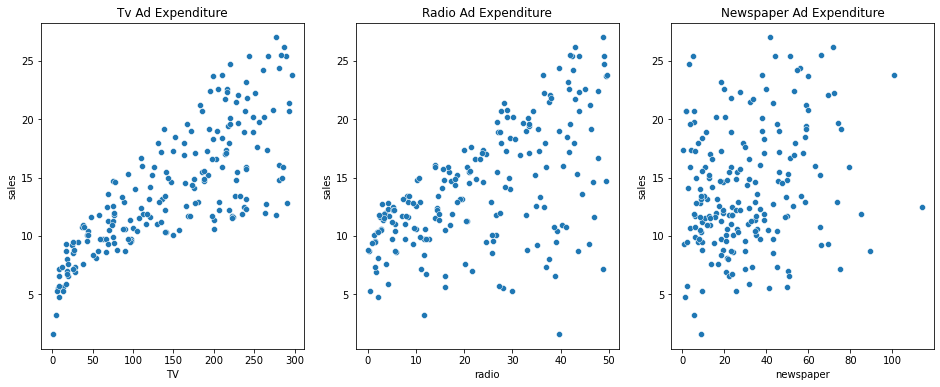

In [9]:
# First, explore visually

fig,axes = plt.subplots(nrows=1, ncols=3,figsize=(16,6))

for i, column in enumerate(df.drop('sales', axis=1)):
    sns.scatterplot(data=df, x=column, y='sales', ax=axes[i])
    axes[i].set_title(f'{column.capitalize()} Ad Expenditure') 

# for i in range(len(axes)): 
#     print(i)
#     axes[i] = sns.scatterplot(data=df, x=df.iloc[:,i], y=df['sales'])

# for ax in df.drop('sales',axis=1):
#     sns.scatterplot()

# note that TV and Radio Spend do have some kind of positive correlation: as we increase TV and Radio Ad Expenditure, sales are more likely to go up 

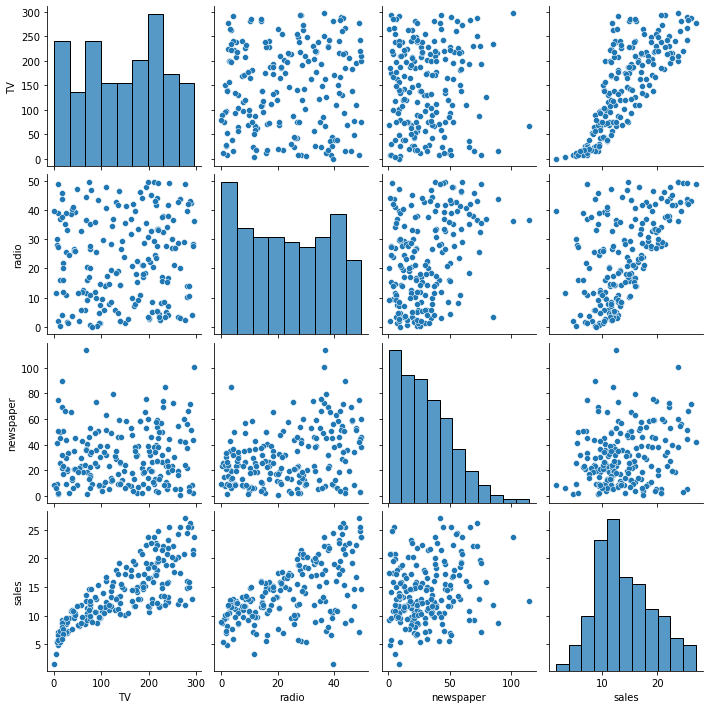

In [10]:
sns.pairplot(df)
# this also show the relatioship between each feature -> important for Polynomial Regression -> there might be a synergy between running both radio ads and newspaper ads

In [11]:
X = df.drop('sales',axis=1)
# note that for more complex algorithms we may do some pre-processing to the data, e.g. standardizing, normalizing, etc. 

In [13]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [14]:
y = df['sales']

In [15]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
# help(train_test_split)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
X_train.head()

,TV,radio,newspaper
42,293.6,27.7,1.8
189,18.7,12.1,23.4
90,134.3,4.9,9.3
136,25.6,39.0,9.3
51,100.4,9.6,3.6


In [22]:
len(X_train)

134

In [24]:
len(X)*2/3

133.33333333333334

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
# help(LinearRegression)^
# call to explore the hyper-parameters of the model 

In [27]:
model = LinearRegression()
# when first using a model, use the default parameters to check its baseline performance

In [28]:
model.fit(X_train, y_train)

LinearRegression()

In [32]:
pred = model.predict(X_test)
pred

array([16.58673085, 21.18622524, 21.66752973, 10.81086512, 22.25210881,
       13.31459455, 21.23875284,  7.38400509, 13.43971113, 15.19445383,
        9.01548612,  6.56945204, 14.4156926 ,  8.93560138,  9.56335776,
       12.10760805,  8.86091137, 16.25163621, 10.31036304, 18.83571624,
       19.81058732, 13.67550716, 12.45182294, 21.58072583,  7.67409148,
        5.67090757, 20.95448184, 11.89301758,  9.13043149,  8.49435255,
       12.32217788,  9.99097553, 21.71995241, 12.64869606, 18.25348116,
       20.17390876, 14.20864218, 21.02816483, 10.91608737,  4.42671034,
        9.59359543, 12.53133363, 10.14637196,  8.1294087 , 13.32973122,
        5.27563699,  9.30534511, 14.15272317,  8.75979349, 11.67053724,
       15.66273733, 11.75350353, 13.21744723, 11.06273296,  6.41769181,
        9.84865789,  9.45756213, 24.32601732,  7.68903682, 12.30794356,
       17.57952015, 15.27952025, 11.45659815, 11.12311877, 16.60003773,
        6.90611478])

In [65]:
f'MAE = {(y_test-pred).abs().mean():.2f}'
# performance evaluation: how can we evaluate quantitatively the error in a regression task -> we can to evaluate the fit of a regression algorithm

'MAE = 1.49'

In [66]:
f'MSE = {((y_test-pred)**2).mean():.2f}'

'MSE = 3.73'

In [67]:
f'RMSE = {np.sqrt((y_test-pred)**2).mean():.2f}'

'RMSE = 1.49'

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [53]:
df['sales'].mean()

14.0225

<AxesSubplot:xlabel='sales', ylabel='Count'>

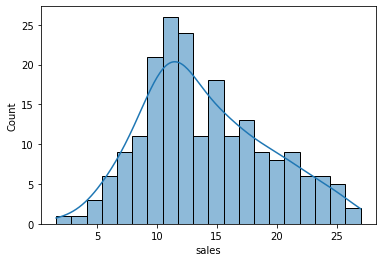

In [57]:
sns.histplot(data=df, x='sales', bins=20,kde=True)

In [58]:
mean_absolute_error(y_test,pred)
# context is everythigng: did we already have a historical model that tried to predict sales based on features? -> comapre the MAEs
# how can we judge this in terms of just my data? Consider the average sales value and the distribution of sales values -> average is 14, distribution goes form 5 to 25
# on average we're off by 1.4 which translates to 1.4=10%*14 -> a 10% error range

1.4937750024728969

In [79]:
f"{df['sales'].mean()/mean_absolute_error(y_test,pred):.2f}% error range for MAE -> my prediction is on average off by about 9%"
# is this error acceptable? -> depends on the context of the situation -> my prediction is on average off by about 10%
# problem: does consider the situation where the model is really far off only for only a few poitns

'9.39% error range for MAE -> my prediction is on average off by about 9%'

In [73]:
mean_squared_error(y_test,pred)
# punishes values that are really off
# problem: cannot be interpreted

3.7279283306815096

In [75]:
# RMSE
rmse= np.sqrt(mean_squared_error(y_test,pred))
rmse
# analogy: standard deviation of your predictions and the MSE can be thought of as the variance of our predictions  

1.9307843822347202

In [78]:
f"{df['sales'].mean()/rmse:.2f}% error range for RMSE -> my prediction is on average off by about 7%"

'7.26% error range for RMSE -> my prediction is on average off by about 7%'

In [ ]:
# it is recommended to use both the MAE & RMSE -> check to see if on average we're doing good & make sure the prediction is not far off for some data poinst